In [20]:
%load_ext autoreload
%autoreload 2

# import keras
import keras

# import keras_retinanet
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import time

# set tf backend to allow memory to grow, instead of claiming everything
import tensorflow as tf

def get_session():
    config = tf.ConfigProto(device_count = {'GPU': 0})#
    config.gpu_options.allow_growth = True
    return tf.Session(config=config)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
!retinanet-convert-model ./snapshots/resnet50_csv_30.h5 ./inference_model.h5

Using TensorFlow backend.
2019-05-04 13:47:10.926557: I tensorflow/core/common_runtime/gpu/gpu_device.cc:982] Device interconnect StreamExecutor with strength 1 edge matrix:
2019-05-04 13:47:10.926589: I tensorflow/core/common_runtime/gpu/gpu_device.cc:988]      


In [5]:
from keras_retinanet.models import load_model
model = load_model('./inference_model.h5', backbone_name='resnet50')

In [6]:
labels_to_names = {0: 'Healthy', 1:'Ill'}

In [16]:
label_color(0)

[31, 0, 255]

processing time:  0.20565319061279297


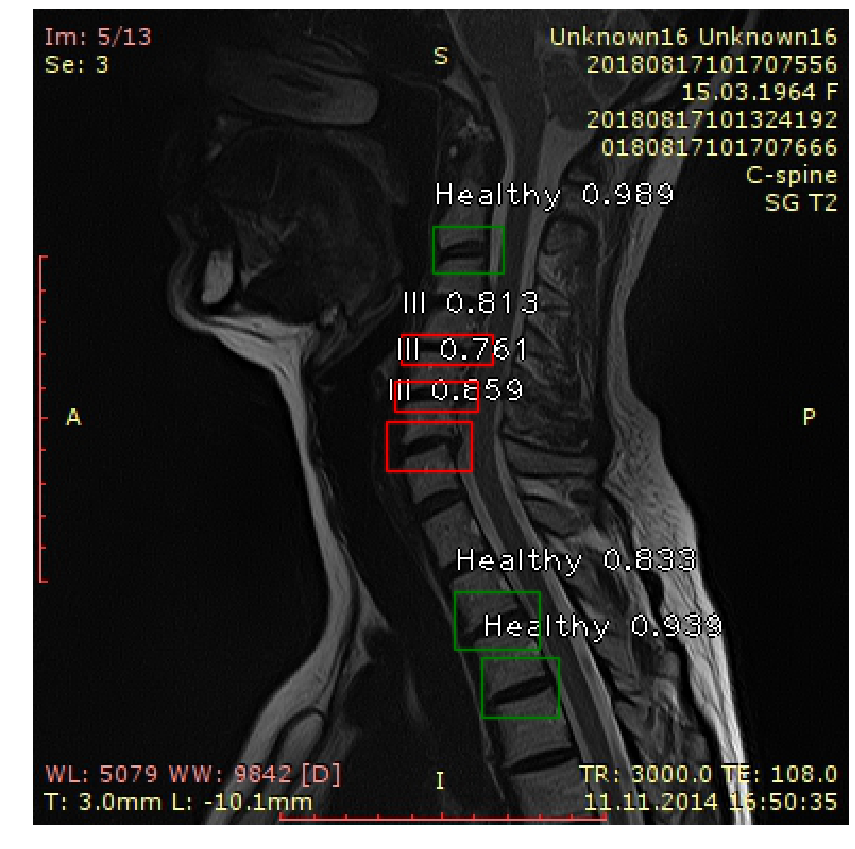

In [23]:
# load image
image = read_image_bgr('./DataSets/images/img_00329.jpg')

# copy to draw on
draw = image.copy()
draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

# preprocess image for network
image = preprocess_image(image)
image, scale = resize_image(image)

# process image
start = time.time()
boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
print("processing time: ", time.time() - start)

# correct for image scale
boxes /= scale

# visualize detections
for box, score, label in zip(boxes[0], scores[0], labels[0]):
    # scores are sorted so we can break
    if score < 0.5:
        break
        
    color = label_color(label)
    
    b = box.astype(int)
    draw_box(draw, b, color=color, thickness=1)
    
    caption = "{} {:.3f}".format(labels_to_names[label], score)
    draw_caption(draw, b, caption)
    
plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(draw, origin='upper')
plt.show()